# Лабораторная работа 2

## Линейная регрессия

## Часть 1: Приближаем функции


### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна;
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Теперь мы хотим построить **модель**, т.е. определить алгоритм, который будет принимать на вход некоторый набор параметров (в данном случае это измеренные нами $H, W, L$ и $N$), и выдавать значение некоторой **целевой переменной** (в данном примере это $S$). Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:

$$S = a_0 + a_1H + a_2W + a_3L + a_4N.$$

Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_0, a_1, a_2, a_3, a_4$, удовлетворяющие вот такому требованию:
$$\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 \longrightarrow \min$$
Т.е. мы хотим, чтобы квадрат отклонения правой части от левой был поменьше для всех $n$ студентов. Введём несколько обозначений:
$$X =
\begin{pmatrix}
1 & H_1 & W_1 & L_1 & N_1\\
1 & H_2 & W_2 & L_2 & N_2\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & H_n & W_n & L_n & N_n
\end{pmatrix}, \qquad a=
\begin{pmatrix}
a_0\\ a_1\\ \vdots\\ a_4
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}.$$

Теперь наше требование выше можно переписать в таком виде:
$$
\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 = |y - Xa|^2 \longrightarrow \min
$$

И теперь видно, что мы получили задачу на метод наименьших квадратов!
Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём Вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (3.1 баллов)

**ВАЖНО! В этом задании вам нельзя использовать циклы (в том числе рекурсии, генераторы и конструкции вида map/reduce), кроме цикла в задании 1.5, который мы вам оставили. За наличие цикла в вашем коде мы поставим вам не более половины от стоимости задания.**

Скачайте файлы ``train.txt`` и ``test.txt``. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — некоторое число точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Функцию $f$ мы вам не скажем. Ваша задача — по данным из файла ``train.txt`` (будем называть их обучающей выборкой) подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (из файла ``test.txt``).

In [122]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

PATH = "./"

data_train = np.loadtxt("train.txt", delimiter=',')
data_test = np.loadtxt("test.txt", delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$

In [123]:
X_train = data_train[:,0]
y_train = data_train[:,1]


X_test = data_test[:,0]
y_test = data_test[:,1]

**1. [0,15 балла]** Найдите с помощью метода наименьших квадратов линейную функцию $y = kx + b$, наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [124]:
n = data_train.shape[0]
first = np.ones(n).reshape(n, 1)
second = X_train.reshape(n, 1)
matrix = np.concatenate((first, second), axis=1)
matrix_t = np.array(matrix.T)
xx = np.array(np.array(matrix.dot(np.linalg.inv(matrix_t.dot(matrix)))).dot(matrix_t)).dot(y_train)
k = (xx[1] - xx[0]) / (X_train[1] - X_train[0])
print(f'Для train: {k}x + {xx[0] - X_train[0] * k}')

Для train: 4.048356078106742x + 2.453932233062655


**2. [0,15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

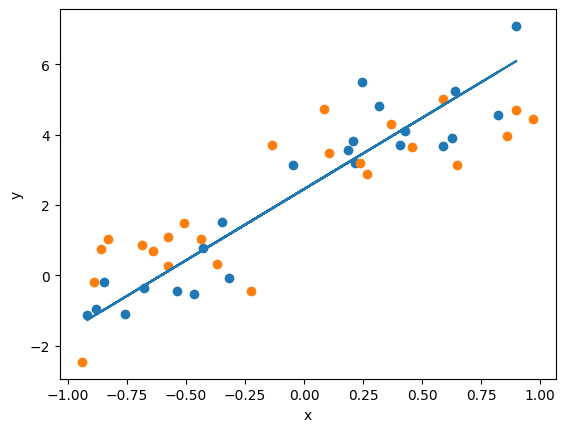

In [125]:
plt.plot(X_train, xx)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**3. [0,4 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и сохраните его коэффициенты в массив `poly_coef` (от младшего члена к старшему). Обязательно обоснуйте выбор степени многочлена.

In [126]:
# Интерполяционный многочлен Лагранжа, степень = data_train.shape[0] -
1
vand_matrix = np.vander(X_train, increasing = True)
poly_coef = np.linalg.solve(vand_matrix, y_train)
print(poly_coef)

[-5.48926212e+02 -6.14629656e+03  1.39862270e+05 -1.18645018e+05
 -5.21073358e+06  1.05245157e+07  8.93726632e+07 -2.08484623e+08
 -8.92060401e+08  2.06324677e+09  5.70521560e+09 -1.19453606e+10
 -2.43891612e+10  4.27057847e+10  7.04031451e+10 -9.50454242e+10
 -1.35000421e+11  1.27622133e+11  1.63800285e+11 -9.41575690e+10
 -1.12998792e+11  2.91737727e+10  3.35216740e+10]


**4. [0,15 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок. Удалось ли графику пройти через все точки из выборки? Попробуйте объяснить, почему?

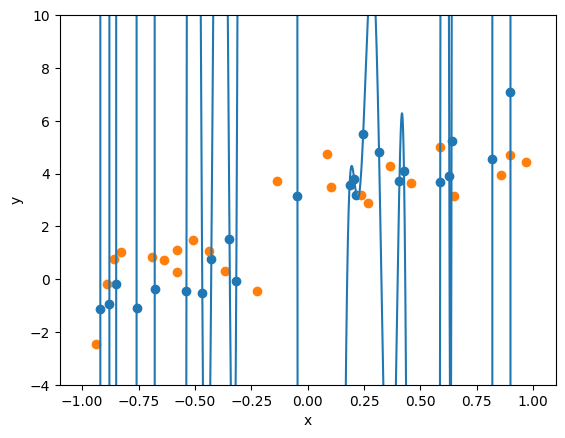

In [127]:
plt.scatter(X_train, y_train)
x = np.arange(-1, 1, 0.0001)
v = np.vander(x, len(poly_coef), increasing = True)
y = np.dot(v, poly_coef)
plt.ylim(-4, 10)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_test, y_test)
plt.show()

**5. [0,5 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Сохраните найденные коэффициенты многочленов в матрицу `poly_coefs` (коэффициенты многочлена степени $j$ должны быть сохранены в $j$-й строке матрицы от младшего члена к старшему).

In [128]:
poly_coefs = np.zeros([10, 11])
for k in range(2, 12):
    m = np.vander(X_train, k, increasing=True)
    y = np.array(y_train)
    ans = np.linalg.inv(m.T@m)@m.T@y.T
    poly_coefs[k - 2] = np.pad(ans, 11 - k)[11 - k:]

**6. [0,6 балл]** Для каждого из многочленов из задания 1.5, а также для многочлена из задания 1.4 найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$. Полученные значения ошибок сохраните в матрицу `errors` высоты 11 и ширины 2. В первом столбце матрицы должны стоять значения ошибок на тренировочных данных, во втором --- на тестовых. В первых 10 строках матрицы должны стоять значения ошибок для многочленов соответствующих степений из задания 1.5, в 11-й строке --- значение ошибки для многочлена из задания 1.4.

In [129]:
X = np.vander(X_train, 11, increasing=True)
errors = poly_coefs @ X.T
y_1 = np.ones([len(errors), len(errors[0])]) @ np.diag(y_train)
errors = np.mean((y_1 - errors)**2, axis=1)
answer = poly_coefs @ X.T

X_2 = np.vander(X_test, 11, increasing=True)
errors_2 = poly_coefs @ X_2.T
y_2 = np.ones([len(errors_2), len(errors_2[0])]) @ np.diag(y_test)
errors_2 = np.mean((y_2 - errors_2)**2, axis=1)
# print(errors_2)

matrix = np.concatenate((errors.reshape(len(errors), 1),
errors_2.reshape(len(errors_2), 1)), axis=1)
# print(matrix)

X = np.vander(X_train, len(poly_coef), increasing=True)
ans1 = (X@poly_coef - y_train)@(X@poly_coef - y_train).T

X = np.vander(X_test, len(poly_coef), increasing=True)
ans2 = (X@poly_coef - y_test)@(X@poly_coef - y_test).T

matrix = np.append(matrix, ans1)
matrix = np.append(matrix, ans2)
matrix = matrix.reshape(len(matrix) // 2, 2)
print(matrix)

[[7.00912588e-01 1.64930169e+00]
 [6.91992919e-01 1.56859711e+00]
 [6.53662070e-01 1.48196170e+00]
 [4.52989800e-01 2.25266387e+00]
 [3.69973832e-01 2.41600793e+00]
 [3.69614394e-01 2.49195289e+00]
 [3.54844465e-01 3.18560667e+00]
 [3.52453365e-01 3.59296147e+00]
 [3.38277875e-01 5.26186318e+00]
 [3.32784411e-01 7.99284845e+00]
 [3.28810328e-10 1.59783020e+16]]


**7. [0,5 балла]** Для $k = 1,2,3,4,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

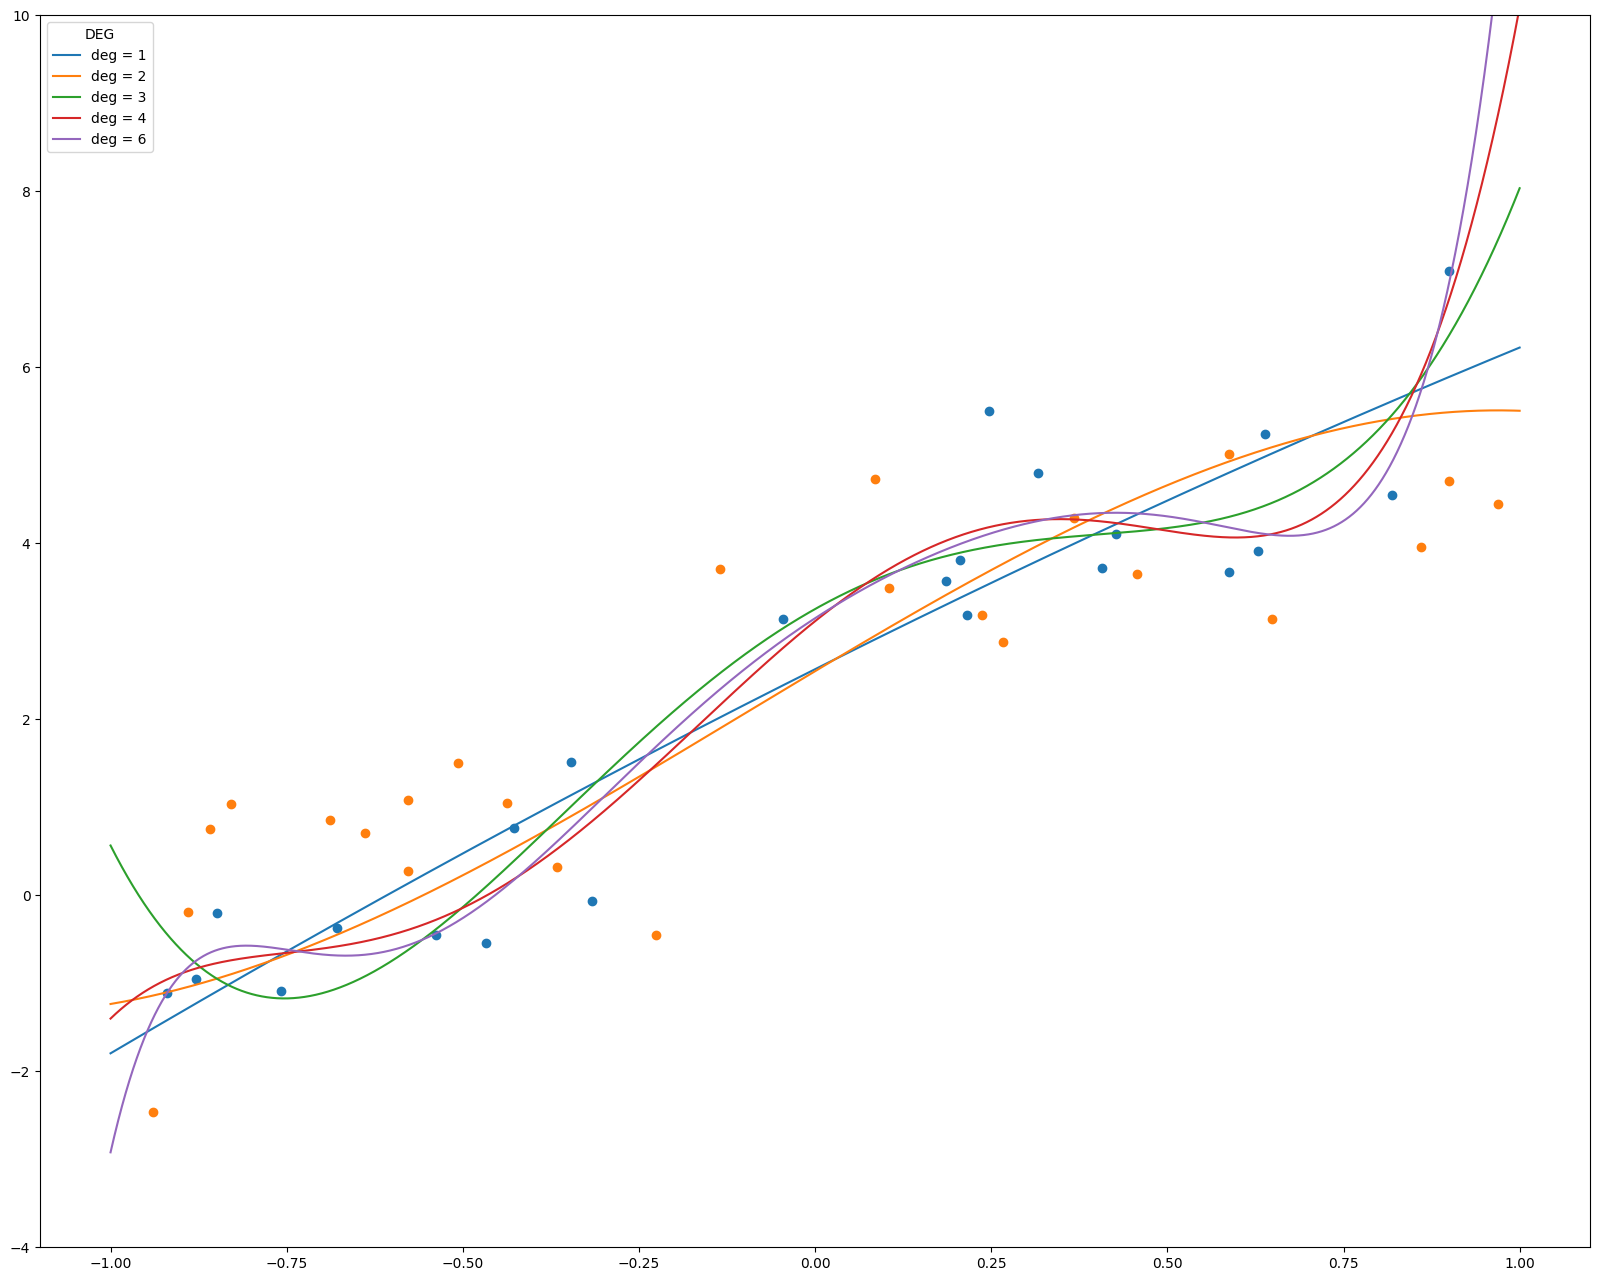

In [130]:
plt.figure(figsize=(20, 16))

plt.scatter(X_train, y_train)

plt.scatter(X_test, y_test)

x = np.arange(-1, 1, 0.0001)
v = np.vander(x, len(poly_coefs[1]), increasing = True)
y = np.dot(v, poly_coefs[1])

plt.ylim(-4, 10)
plt.plot(x, y, marker ='', label='deg = 1')

x = np.arange(-1, 1, 0.0001)
v = np.vander(x, len(poly_coefs[2]), increasing = True)
y = np.dot(v, poly_coefs[2])
plt.ylim(-4, 10)
plt.plot(x, y, marker='', label='deg = 2')

x = np.arange(-1, 1, 0.0001)
v = np.vander(x, len(poly_coefs[3]), increasing = True)
y = np.dot(v, poly_coefs[3])
plt.ylim(-4, 10)
plt.plot(x, y, marker='', label='deg = 3')

x = np.arange(-1, 1, 0.0001)
v = np.vander(x, len(poly_coefs[4]), increasing = True)
y = np.dot(v, poly_coefs[4])
plt.ylim(-4, 10)
plt.plot(x, y, marker='', label='deg = 4')

x = np.arange(-1, 1, 0.0001)
v = np.vander(x, len(poly_coefs[6]), increasing = True)
y = np.dot(v, poly_coefs[6])
plt.ylim(-4, 10)
plt.plot(x, y, marker='',label='deg = 6')

plt.legend(title = 'DEG')
plt.show()

**8. [0,65 балла]** Что происходит с ошибкой на тестовых данных при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как называется наблюдаемый вами эффект?

**Ответ:** Переобучение название данного эффекта Чем больше степень,
тем сильнее колебания у многочлена самое наглядное -
интерполяционный. Многочлен с высокой степенью подстраивается под
тренировочные данные и неправильно себя ведет в общем случае.

## Часть 2: Обучаем машины

### Задание 2. Линейная регрессия (3 балла)

В этом задании вам предстоит заняться предсказанием цен на алмазы. Скачайте файл `diamonds_features.csv`, содержащий данные, с которыми вам предстоит работать. Запустите следующую ячейку:

In [131]:
data = np.loadtxt("diamonds_features.csv", delimiter=",", dtype="str")[1:, :]
print(data[:5, :])

[['0.8' 'Ideal' 'F' 'VS1' '62.4' '55.0' '5.92' '5.88' '3.68' '3884']
 ['0.91' 'Premium' 'F' 'SI2' '61.4' '60.0' '6.23' '6.21' '3.82' '3618']
 ['1.28' 'Premium' 'I' 'VS2' '61.7' '60.0' '7.05' '6.95' '4.32' '6762']
 ['0.41' 'Very Good' 'F' 'SI1' '61.9' '55.0' '4.78' '4.81' '2.97' '769']
 ['1.07' 'Premium' 'F' 'SI2' '61.8' '59.0' '6.53' '6.57' '4.05' '4560']]


Мы вывели для вас первые 5 строчек данных. Описания значений в колонках вы можете найти в файле `diamonds_descriptions.txt`.

Глобально в этом задании вам предстоит научиться строить модель линейной регрессии для предсказания цены алмаза по его признакам. Данные устроены таким образом, что в каждой строчке располагаются признаки, описывающие объект (алмаз), а в каждой фиксированной колонке --- всевозможные значения конкретного признака для всех объектов в данных.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) с параметром `test_size=0.3`. Обязательно зафиксируйте параметр `random_state`.

In [132]:
from sklearn.model_selection import train_test_split
x = data[:, :-1]
y = data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(data, y,
test_size=0.3, random_state=42)

Теперь у вас есть две выборки, каждая из которых содержит случайное подмножество наших данных. Обучающую выборку мы в дальнейшем будем использовать для обучения модели линейной регрессии, а тестовую, соответственно, для теста.

**ВАЖНО: за обучение модели на тестовой выборке будем ставить 0 за весь пункт!**

### Работаем с числовыми данными

Сейчас ваши данные содержат как привычные вам числовые признаки, описывающие объект, так и категориальные признаки, которые описывают принадлежность объекта к той или иной категории, и в данных представляются строками. Что делать с данными, которые представлены строками --- мы разберёмся чуть позже, а пока давайте забудем, что они у нас есть, и будем работать только с числовыми.

**0,5. [0 баллов]** Заполните переменные `numeric_features` и `categorical_features` индексами столбцов в данных, содержащих числовые и категориальные признаки соответственно. После этого можно проверить, что массив `data[:, numeric_features]` содержит только числовые данные.

In [133]:
numeric_features = [0, 4, 5, 6, 7, 8, 9]
categorical_features = [1, 2, 3]
print(data[:, numeric_features])

[['0.8' '62.4' '55.0' ... '5.88' '3.68' '3884']
 ['0.91' '61.4' '60.0' ... '6.21' '3.82' '3618']
 ['1.28' '61.7' '60.0' ... '6.95' '4.32' '6762']
 ...
 ['0.31' '61.4' '56.0' ... '4.41' '2.7' '609']
 ['0.36' '62.0' '59.0' ... '4.51' '2.81' '807']
 ['0.31' '59.0' '62.0' ... '4.43' '2.61' '755']]


**1. [0,3 баллов]** Решите задачу линейной регрессии для предсказания цены алмаза по его числовым признакам (не забудьте, что линейная модель должна также содержать свободный от признаков член) и протестируйте ваше решение на тестовых данных. Выведите полученные регрессионные коэффициенты для каждого признака. Попробуйте проинтерпретировать полученные коэффициенты: сравните их друг с другом, посмотрите на их знаки и на абсолютную величину и попробуйте на основе этого придать им житейский смысл. Согласуется ли построенная интерпретация модели с вашими представлениями о жизни? 

*Примечание: обратите внимание, сейчас все данные у вас хранятся в строковом виде. Чтобы работать с ними как с числами, необоходимо явно привести их к типу float. В NumPy для этого есть специальная удобная команда astype.*

In [134]:
onesArr = np.ones((X_train.shape[0],1))
arr = np.concatenate((onesArr, X_train[:, numeric_features[:6]]),
axis=1)
arr = arr.astype(float)
ans = np.linalg.inv(arr.T@arr)@arr.T@y_train.astype(float)
print(f'Коэффициенты: {ans}')
onesArr = np.ones((X_test.shape[0],1))
arr = np.concatenate((onesArr, X_test[:, numeric_features[:6]]),
axis=1)
arr = arr.astype(float)
print(f'Разница с тестовыми: {arr@ans - y_test.astype(float)}')
dif = (arr@ans - y_test.astype(float)) * (arr@ans -
y_test.astype(float))
print(f'Квадраты разницы с тестовыми {dif}')
print(f'Сумма квадратов откленений, деленная на n = {np.sum(dif) / len(X_test)}')

Коэффициенты: [20320.69383286 10786.23794007  -199.27867511   -95.04055851
 -1308.08011017    24.32725833    37.04825216]
Разница с тестовыми: [-253.19929602 -503.79065135 -312.18018504 ...  669.39324239 -349.90393987
  412.21791428]
Квадраты разницы с тестовыми [ 64109.88350515 253805.02039262  97456.46793376 ... 448087.31296173
 122432.76713639 169923.60885295]
Сумма квадратов откленений, деленная на n = 2113575.917120557


Если вы всё сделали правильно, у вас должны были получиться довольно большие по абсолютной величине коэффициенты.

**2. [0,15 баллов]** Попробуйте объяснить, почему ситуация, когда модель имеет большие по модулю коэффиценты, нежелательна?

Подсказка: Вы можете попытаться проиллюстрировать свои рассуждения, искусственно описав с помощью исследуемых признаков два алмаза, которые по вашему мнению должны иметь одинаковую цену, и проверить, выдаст ли построенная модель близкие предсказания на этих объектах.

In [135]:
first_diamond = [1, 1, 1, 1, 1, 1, 10]
second_diamond = [1, 1, 1, 1, 10, 1, 1]
print(first_diamond @ ans)
print(second_diamond @ ans)
print('Алмазы полностью одинаковые, но цена одного в 1,5 раза больше другого. Это потому что коэфф-ты линейной регрессии большие.')

29899.34220905381
17793.18694810031
Алмазы полностью одинаковые, но цена одного в 1,5 раза больше другого. Это потому что коэфф-ты линейной регрессии большие.


**3. [0.2 баллов]** Нарисуйте гистограмму, характеризующую распределение объясняемой переменной в обучающей выборке. На такой диаграмме по оси `x` должны быть сгруппированные значения объясняемой переменной, а по оси `y` --- количество объектов выборки с таким значением. Столбцов на вашем графике должно быть не менее 50.

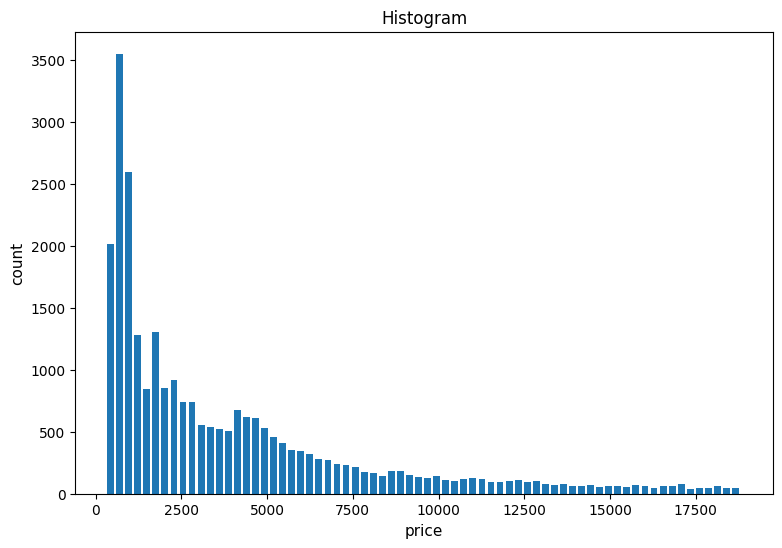

In [136]:
plt.figure(figsize=(9,6))
plt.hist(y_train.astype(float), bins = 70, width=200)
plt.xlabel('price', fontsize=11)
plt.ylabel('count', fontsize=11)
plt.title('Histogram')
plt.show()

В левой части гистограммы располагаются небольшие значения целевой переменной, и объектов с таким значением в выборке довольно много (не забываем, что у нас тут не абстрактная математика в вакууме, мы тут цену алмазов предсказываем!); с увеличением значения таргета (целевой переменной) количество соответствующих объектов в выборке убывает. Сначала число объектов убывает довольно стремительно, но с некоторого момента разница в высоте между соседними столбцами уже почти незаметна. Такое явление называется "распределение с тяжёлым хвостом", и оно не очень желательно при построении модели.

Попробуем избавиться от тяжёлого хвоста. Для этого нужно применить к таргету какую-нибудь медленнорастущую биективную функцию, например логарифм. 

<!-- Однако вспомним, что мы намеренно отмасштабировали таргет таким образом, чтобы среди его значений был 0, поэтому нужно придумать ещё какое-то преобразование, чтобы все значения целевой переменной попали в область определения логарифма. -->

**4. [0,25 баллов]** Прологарифмируйте целевую переменную и нарисуйте график распределения логарифмированного таргета. Сильно ли он отличается от предыдущего графика? Попробуйте объяснить, почему явление "распределения с тяжёлым хвостом" нежелательно при построении модели.

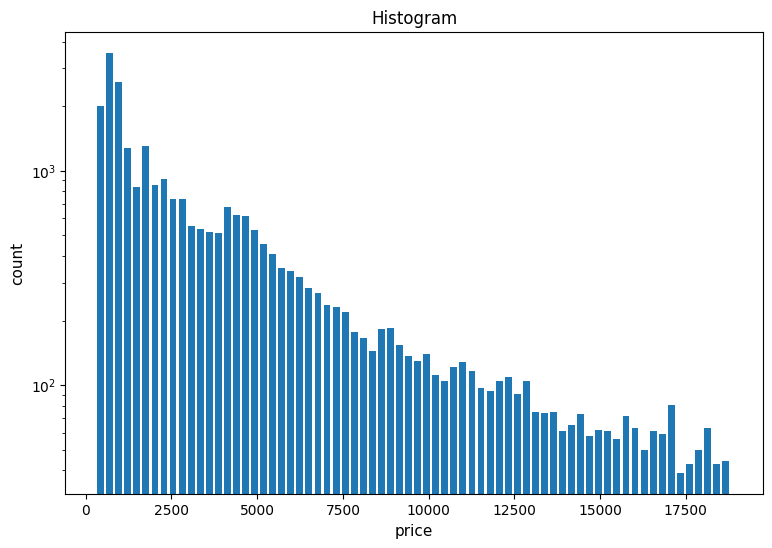

In [137]:
plt.figure(figsize=(9,6))
plt.hist(y_train.astype(float), bins = 70, log=True, width=200)
plt.xlabel('price', fontsize=11)
plt.ylabel('count', fontsize=11)
plt.title('Histogram')
plt.show()

Ваше обоснование здесь: Распределение далеко от нормы логарифм,
сглаживает график функции.

Снова обучите линейную модель, считая целевой переменной логарифмированный таргет. Помните, что чтобы протестировать полученную линейную модель, важно взять экспоненту от полученных предсказаний.

In [138]:
onesArr = np.ones((X_train.shape[0],1))
arr = np.concatenate((onesArr, X_train[:, numeric_features[:6]]),
axis=1)
arr = arr.astype(float)
ans = np.linalg.inv(arr.T@arr)@arr.T@np.log(y_train.astype(float))
print(f'Коэффициенты: {ans}')
onesArr = np.ones((X_test.shape[0],1))
arr = np.concatenate((onesArr, X_test[:, numeric_features[:6]]),
axis=1)
arr = arr.astype(float)
print(f'Разница с тестовыми: {np.exp(arr@ans) - y_test.astype(float)}')
dif = (np.exp(arr@ans) - y_test.astype(float)) * (np.exp(arr@ans) - y_test.astype(float))
print(f'Квадраты разницы с тестовыми {dif}')
print(f'Сумма квадратов откленений, деленная на n = {np.sum(dif) / len(X_test)}')

Коэффициенты: [ 0.68763929 -0.73978634  0.02345871 -0.00891653  1.13200348  0.01680622
  0.04767011]
Разница с тестовыми: [ -599.40529888 -1023.53713945  -236.31045519 ...    90.64877454
  -142.17394776  -281.06383166]
Квадраты разницы с тестовыми [ 359286.7123241  1047628.27582697   55842.63123028 ...    8217.20032522
   20213.43142052   78996.87746704]
Сумма квадратов откленений, деленная на n = 2514576.890210342


Удалось ли добиться лучшего качества?

Ответ: Нет, так как графики отличаются, распределения с тяжёлым
хвостом плохо влияет на линейную регрессию. Модель сильно
подстраивается под хвост и хуже оценивает общий случай


### Работаем с категориальными признаками

До сих пор мы работали с данными, которые представляются числами. Однако часто в датасетах объекты описываются не только признаками, содержащими числа, но и строковыми признаками, определяющими принадлежность объекта к некоторой категории. Такие признаки называются категориальными. Важно не выкидывать их из модели, потому что часто они содержат довольно полезную информацию об объекте, которую хорошая модель должна обязательно учитывать.

В этом разделе мы будем рассматривать только категориальные признаки, временно забыв про числовые.

Естесственно, нам нужно придумать, как закодировать категориальные признаки числами. Есть довольно много подходов к такой кодировке, но мы рассмотрим два самых базовых. Первая мысль, которая приходит в голову такая: давайте занумеруем все категории фиксированного признака, и заменим их строковое представление соответствующим численным.

**5. [0,3 баллов]** Реализуйте описанную выше процедуру кодирования для всех категориальных признаков в выборке. Вы можете сделать это самостоятельно, а можете разобраться в классе `OrdinalEncoder` библиотеки `sklearn`. Обучите линейную модель на закодированных категориальных признаках и протестируйте. 

In [139]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(X_train[:, categorical_features])
M = enc.transform(X_train[:, categorical_features])
onesArr = np.ones((M.shape[0],1))
arr = np.concatenate((onesArr, M), axis=1)
arr = arr.astype(float)
ans = np.linalg.inv(arr.T@arr)@arr.T@y_train.astype(float)
print(f'Коэффициенты: {ans}')
enc.fit(X_test[:, categorical_features])
M = enc.transform(X_test[:, categorical_features])
onesArr = np.ones((M.shape[0],1))
arr = np.concatenate((onesArr, M), axis=1)
arr = arr.astype(float)
print(f'Разница с тестовыми: {arr@ans - y_test.astype(float)}')
dif = (arr@ans - y_test.astype(float)) * (arr@ans -
y_test.astype(float))
print(f'Квадраты разницы с тестовыми {dif}')
print(f'Сумма квадратов откленений, деленная на n = {np.sum(dif) / len(X_test)}')

Коэффициенты: [3055.26934541  180.89959983  392.14517455 -155.84397775]
Разница с тестовыми: [-2988.4294615    765.66009097  2639.33980206 ...  1474.5705385
  4065.80526552  -315.0834866 ]
Квадраты разницы с тестовыми [ 8930710.6463547    586235.37490854  6966114.59071378 ...
  2174358.27301538 16530772.45716099    99277.60353095]
Сумма квадратов откленений, деленная на n = 15048362.376893226


Подумайте, в чём потенциальные проблемы такого кодирования? (Подсказка: пусть изначально мы закодировали категорию A числом 1, а категорию B числом 2, а потом решили сделать наоборот: A <-> 2, B <-> 1. Подумайте, может ли измениться качество модели? А должно ли?)

Ваше обоснование здесь: Например, если параметры - низкий, средний,
высокий, то мы могли дать им коды 2, 1, 3 и тогда низкий к высокому
ближе чем средний к высокому что неверно.


Теперь давайте попробуем исправить недочёты такого способа кодирования категориальных признаков, придумав другой метод. Пусть некоторый признак имеет 4 различные категории: {A, B, C, D}. Заменим этот признак на 4 бинарных признака. Каждый из новых признаков будет являться индикатором одной из этих четырёх категорий: если некоторый объект имел категорию A, то после нашего кодирования значение признака, соответствующего категории А у этого объекта будет равно $1$, а значения оставшихся трёх признаков будут $0$. Небольшая иллюстрация: пусть так выглядела выборка до кодирования

| Объект | Признак |
| :----------:|:-:|
| X | "B" |
| Y | "D" |

А так будет выглядеть после кодирования:

| Объект | Признак == "A" | Признак == "B" | Признак == "C" | Признак == "D" |
| :----------:|:-:|:-:|:-:|:-:|
| X | 0 | 1 | 0 | 0 |
| Y | 0 | 0 | 0 | 1 |


**6. [0,3 баллов]** Реализуйте описанную выше процедуру кодирования для всех категориальных признаков в выборке. Вы можете сделать это самостоятельно, а можете разобраться в классе `OneHotEncoder` библиотеки `sklearn`. Обучите линейную модель на закодированных категориальных признаках и протестируйте. 

In [140]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X_train[:, categorical_features])
M = enc.transform(X_train[:, categorical_features]).toarray()
onesArr = np.ones((M.shape[0],1))
arr = np.concatenate((onesArr, M), axis=1)
ans = np.linalg.inv(arr.T@arr)@arr.T@y_train.astype(float)
print(f'Коэффициенты: {ans}')

enc = OneHotEncoder()
enc.fit(X_test[:, categorical_features])
M = enc.transform(X_test[:, categorical_features]).toarray()
onesArr = np.ones((M.shape[0],1))
arr = np.concatenate((onesArr, M), axis=1)
print(f'Разница с тестовыми: {arr@ans - y_test.astype(float)}')

dif = (arr@ans - y_test.astype(float)) * (arr@ans - y_test.astype(float))
print(f'Квадраты разницы с тестовыми {dif}')
print(f'Сумма квадратов откленений, деленная на n = {np.sum(dif) / len(X_test)}')

Коэффициенты: [ 199907.3474884    18003.31835938  -25230.93579102   18707.31518555
   33222.03857422   47215.75024414  -58946.56787109  -38492.56933594
  -44734.06933594  -33446.29980469    -911.08837891  -39809.39990234
   23640.62548828  -64002.28564453 -194636.63476562  -49059.11474609
 -156392.21533203 -175631.56933594 -153922.56471252 -175661.9609375
 -173801.29736328]
Разница с тестовыми: [132277.20198059 -13140.27189636  22821.12532043 ... 136740.20198059
  22302.93952942  87754.99714661]
Квадраты разницы с тестовыми [1.74972582e+10 1.72666746e+08 5.20803761e+08 ... 1.86978828e+10
 4.97421112e+08 7.70093952e+09]
Сумма квадратов откленений, деленная на n = 6221518030.187297


Подумайте, в чём потенциальные проблемы такого кодирования? Какие недочёты прошлого метода кодирования исправляет предложенный способ? Какие недочёты есть у этого метода кодирования, которых нет у предыдущего? Который из двух методов выдаёт лучшее качество?

Ваше обоснование здесь: Сильно увеличиваем размерность пространства
и не привносим новой информации. Исправлены недочеты: теперь веса
параметров не разные. Лучшее качество выдает прошлый метод

**7. [0,5 баллов]** Обучите линейную модель на всех данных, выполнив все необходимые преобразования. Постарайтесь добиться меньшей ошибки модели, чем во всех предыдущих заданиях.

In [141]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(X_train[:, categorical_features])
M = enc.transform(X_train[:, categorical_features])

onesArr1 = np.ones((X_train.shape[0],1))
arr1 = np.concatenate((onesArr1, X_train[:, numeric_features[:6]]), axis=1)
arr1 = arr1.astype(float)
answ = np.concatenate((arr1, M), axis=1)
yy = np.linalg.inv(answ.T@answ)@answ.T@y_train.astype(float)
print(yy)

enc = OrdinalEncoder()
enc.fit(X_test[:, categorical_features])
M = enc.transform(X_test[:, categorical_features])
onesArr1 = np.ones((X_test.shape[0],1))

arr1 = np.concatenate((onesArr1, X_test[:, numeric_features[:6]]), axis=1)
arr1 = arr1.astype(float)
answ = np.concatenate((arr1, M), axis=1)

print((answ@yy).shape)
print(y_test.shape)
print(np.sum((answ@yy - y_test.astype(float)) * (answ@yy - y_test.astype(float)))/len(y_test))

[ 1.56467675e+04  1.10982847e+04 -1.49996607e+02 -8.93447341e+01
 -1.20067816e+03  1.60207484e+01  2.02590213e+00  7.85325111e+01
 -2.68941372e+02  2.89361344e+02]
(11328,)
(11328,)
1697461.3903857265


### Feature engineering

**8.** Нарисуйте графики, отображающие зависимость цены алмаза от веса, длины, ширины и глубины (всего должно получиться 4 графика). Проинтерпретируйте наблюдаемую на них зависимость. Согласуется ли она с вашими представлениями о жизни?

*Примечание: для изображения зависимости одной величины от другой лучше всего подходит график типа scatter.*

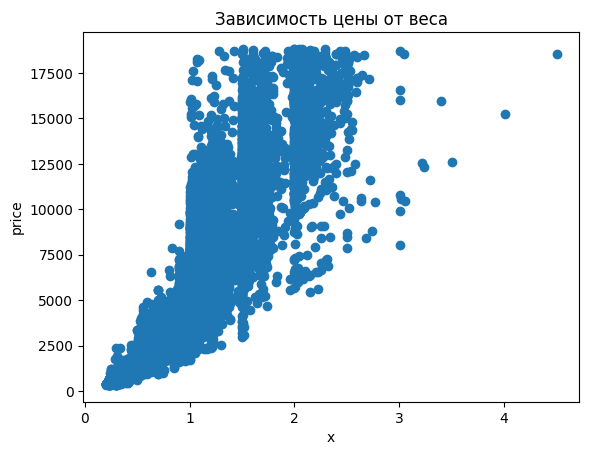

In [142]:
plt.scatter(X_train[:, 0].astype(float), y_train.astype(float))
plt.title("Зависимость цены от веса")
plt.ylabel("price")
plt.xlabel("x")
plt.show()

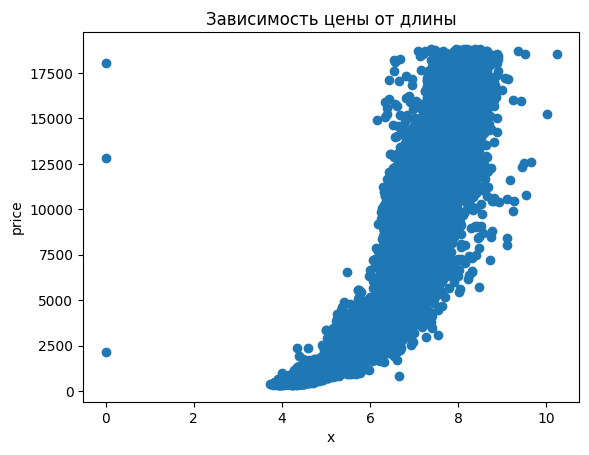

In [143]:
plt.scatter(X_train[:, 6].astype(float), y_train.astype(float))
plt.title("Зависимость цены от длины")
plt.ylabel("price")
plt.xlabel("x")
plt.show()

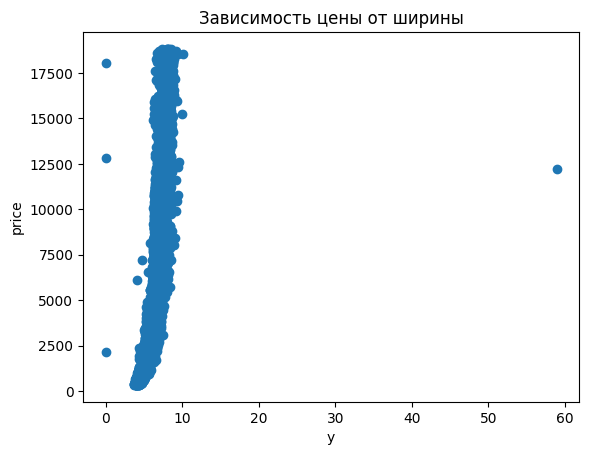

In [144]:
plt.scatter(X_train[:, 7].astype(float), y_train.astype(float))
plt.title("Зависимость цены от ширины")
plt.ylabel("price")
plt.xlabel("y")
plt.show()

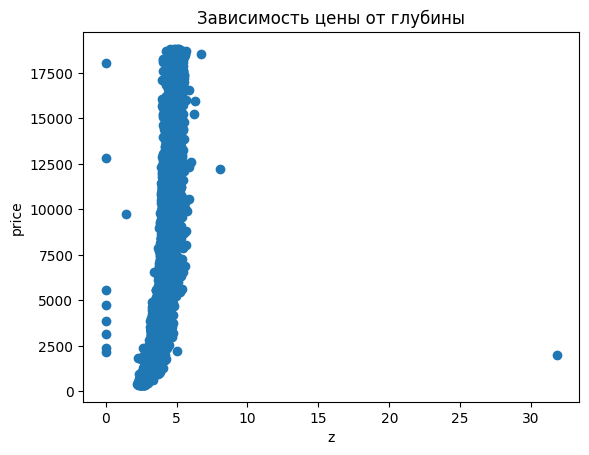

In [145]:
plt.scatter(X_train[:, 8].astype(float), y_train.astype(float))
plt.title("Зависимость цены от глубины")
plt.ylabel("price")
plt.xlabel("z")
plt.show()

**9.** На одном рисунке изобразите график зависимости целевой переменной от признака depth и график зависимости целевой переменной от признака table. Чтобы картинка получилась читаемой, сделайте графики полупрозрачными (параметр `alpha`). Что вы можете сказать о получившемся рисунке? Правда ли, что модели будет достаточно оставить только один из этих признаков? Убедитесь в этом, нарисовав аналогичные графики зависимости признаков depth и table от других числовых признаков.

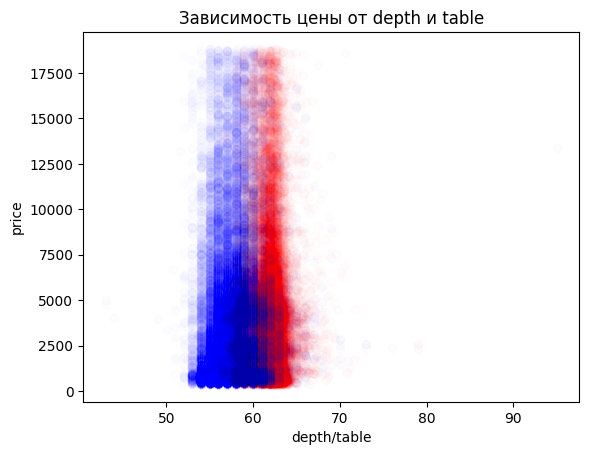

In [146]:
plt.scatter(X_train[:, 4].astype(float), y_train.astype(float), c='r',
alpha=0.01)
plt.scatter(X_train[:, 5].astype(float), y_train.astype(float), c='b',
alpha=0.01)
plt.title("Зависимость цены от depth и table")
plt.ylabel("price")
plt.xlabel("depth/table")
plt.show()

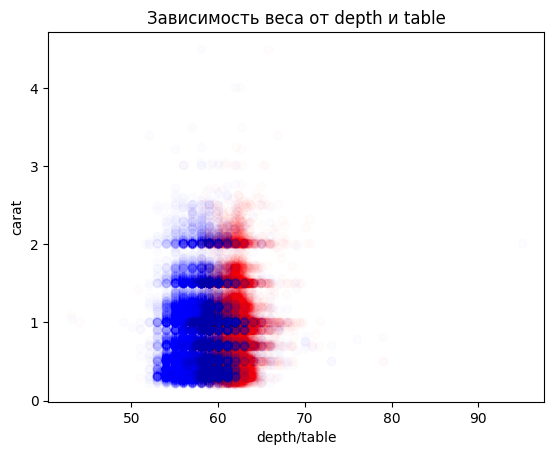

In [147]:
plt.scatter(X_train[:, 4].astype(float), X_train[:, 0].astype(float),
c='r', alpha=0.01)
plt.scatter(X_train[:, 5].astype(float), X_train[:, 0].astype(float),
c='b', alpha=0.01)
plt.title("Зависимость веса от depth и table")
plt.ylabel("carat")
plt.xlabel("depth/table")
plt.show()

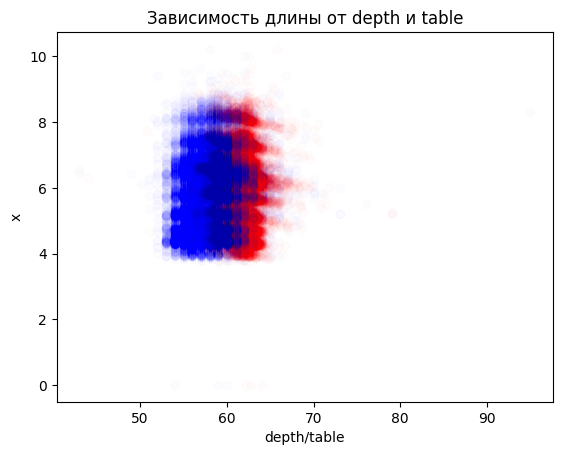

In [148]:
plt.scatter(X_train[:, 4].astype(float), X_train[:, 6].astype(float),
c='r', alpha=0.01)
plt.scatter(X_train[:, 5].astype(float), X_train[:, 6].astype(float),
c='b', alpha=0.01)
plt.title("Зависимость длины от depth и table")
plt.ylabel("x")
plt.xlabel("depth/table")
plt.show()

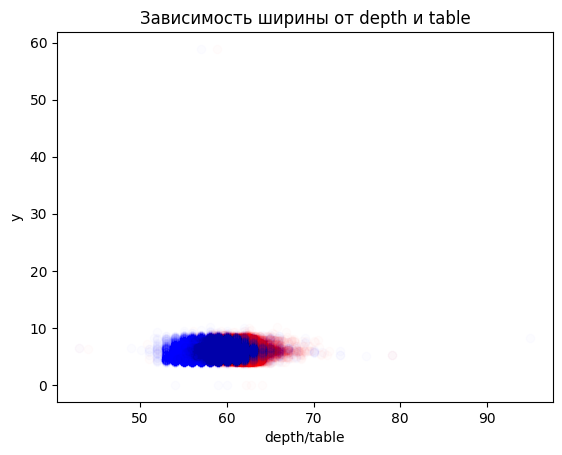

In [149]:
plt.scatter(X_train[:, 4].astype(float), X_train[:, 7].astype(float),
c='r', alpha=0.01)
plt.scatter(X_train[:, 5].astype(float), X_train[:, 7].astype(float),
c='b', alpha=0.01)
plt.title("Зависимость ширины от depth и table")
plt.ylabel("y")
plt.xlabel("depth/table")
plt.show() 

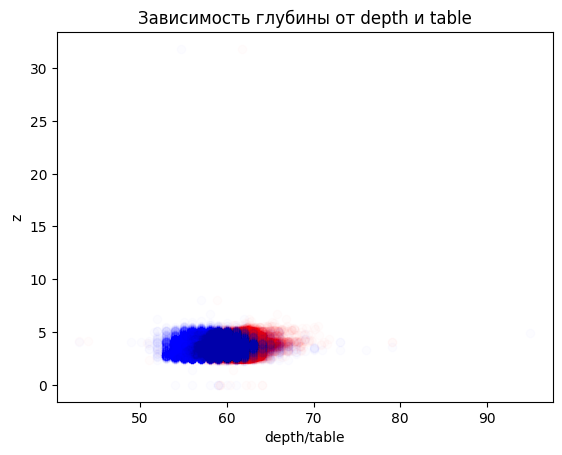

In [150]:
plt.scatter(X_train[:, 4].astype(float), X_train[:, 8].astype(float),
c='r', alpha=0.01)
plt.scatter(X_train[:, 5].astype(float), X_train[:, 8].astype(float),
c='b', alpha=0.01)
plt.title("Зависимость глубины от depth и table")
plt.ylabel("z")
plt.xlabel("depth/table")
plt.show()

Казалось бы, мы тут пытаемся придумать новые признаки, чтобы улучшить модель, зачем нам выбрасывать уже имеющиеся признаки? Дело в том, что если в выборке есть "похожие" в некотором смысле признаки, то модель, обученная на таких данных, может выдавать худший результат, чем если бы похожих признаков в выборке не было. Продемонстрируем это явление на практике.

**10.** Обучите линейную модель, предсказывающую цену алмазов на признаках x, y, z из наших данных. Замерьте качество полученной линейной модели на тестовой выборке, после чего добавьте признак $\tau = \frac{x}{2} + 4y - z + 1$, и снова обучите линейную модель. Которая из моделей добилась лучшего качества?

In [151]:
xx = X_train[:, 0].astype(float)
yy = X_train[:, 0].astype(float)
zz = X_train[:, 0].astype(float)
tt = xx / 2 + 4 * yy - zz + 1
tt.astype(float)
print(X_train)
matrix = np.concatenate((X_train, tt.reshape(-1, 1)), axis=1)
matrix = matrix[:, -4::].astype(float)
print(matrix)
print(matrix.shape)
first = np.ones(matrix.shape[0]).reshape(matrix.shape[0], 1)
x = np.concatenate((first, matrix), axis=1)
print(x)
a = np.linalg.inv(x.T@x)@x.T@y_train.astype(float)
print(a)

[['0.27' 'Ideal' 'E' ... '4.15' '2.57' '622']
 ['0.52' 'Good' 'I' ... '5.1' '3.23' '978']
 ['0.52' 'Very Good' 'H' ... '5.09' '3.23' '1219']
 ...
 ['1.55' 'Premium' 'J' ... '7.35' '4.62' '8749']
 ['0.42' 'Premium' 'E' ... '4.76' '2.97' '1181']
 ['0.7' 'Ideal' 'G' ... '5.8' '3.52' '2995']]
[[4.150e+00 2.570e+00 6.220e+02 1.945e+00]
 [5.100e+00 3.230e+00 9.780e+02 2.820e+00]
 [5.090e+00 3.230e+00 1.219e+03 2.820e+00]
 ...
 [7.350e+00 4.620e+00 8.749e+03 6.425e+00]
 [4.760e+00 2.970e+00 1.181e+03 2.470e+00]
 [5.800e+00 3.520e+00 2.995e+03 3.450e+00]]
(26430, 4)
[[1.000e+00 4.150e+00 2.570e+00 6.220e+02 1.945e+00]
 [1.000e+00 5.100e+00 3.230e+00 9.780e+02 2.820e+00]
 [1.000e+00 5.090e+00 3.230e+00 1.219e+03 2.820e+00]
 ...
 [1.000e+00 7.350e+00 4.620e+00 8.749e+03 6.425e+00]
 [1.000e+00 4.760e+00 2.970e+00 1.181e+03 2.470e+00]
 [1.000e+00 5.800e+00 3.520e+00 2.995e+03 3.450e+00]]
[ 5.37906386e-10 -1.87633797e-11 -5.40872069e-11  1.00000000e+00
  9.84684556e-12]


In [152]:
new_matrix = X_train[:, -3::].astype(float)
print(new_matrix)
first = np.ones(new_matrix.shape[0]).reshape(new_matrix.shape[0], 1)
x_n = np.concatenate((first, new_matrix), axis=1)
print(x_n)
a_n = np.linalg.inv(x_n.T@x_n)@x_n.T@y_train.astype(float)
print(a_n)


[[4.150e+00 2.570e+00 6.220e+02]
 [5.100e+00 3.230e+00 9.780e+02]
 [5.090e+00 3.230e+00 1.219e+03]
 ...
 [7.350e+00 4.620e+00 8.749e+03]
 [4.760e+00 2.970e+00 1.181e+03]
 [5.800e+00 3.520e+00 2.995e+03]]
[[1.000e+00 4.150e+00 2.570e+00 6.220e+02]
 [1.000e+00 5.100e+00 3.230e+00 9.780e+02]
 [1.000e+00 5.090e+00 3.230e+00 1.219e+03]
 ...
 [1.000e+00 7.350e+00 4.620e+00 8.749e+03]
 [1.000e+00 4.760e+00 2.970e+00 1.181e+03]
 [1.000e+00 5.800e+00 3.520e+00 2.995e+03]]
[-1.31899706e-10  2.96498104e-11 -2.21409210e-11  1.00000000e+00]


In [153]:
print((x@a - y_train.astype(float))@(x@a - y_train.astype(float)).T)
print((x_n@a_n - y_train.astype(float))@(x_n@a_n - y_train.astype(float)).T)

1.8662945326186322e-15
1.297279932465115e-16


Объясните, почему наличие похожих признаков в выборке заметно ухудшает качество, выдаваемое линейной моделью?

Ваше обоснование здесь: Признаки могут никак не относиться к нашей
модели - это видно в случае выше. Уравнение взято изнеоткуда и теперь
считается признаком который влияет на цену так же, как и длина,
например

Итак, мы обсудили, исходя из каких соображений можно выбирать преобразования над имеющимися признаками и когда для модели может быть полезнее выкинуть некоторый признак из выборки, чем оставить его. Теперь давайте придумаем совсем новый признак. Для этого снова посмотрим на такие характеристики алмазов, как длина, ширина и глубина. Эти характеристики несомненно важны для предсказания цены алмазов, и все построенные нами модели находили какую-то закономерность, но теперь давайте мы попробуем их объединить в новом признаке `объём`. Для начала будем считать, что объём алмаза неплохо приближается объёмом параллелепипеда с такими же измерениями.

**11.** Обучите линейную модель на 4 признаках: x, y, z, и объём параллелепипеда со сторонами (x, y, z). Сравните качество полученной модели с качеством, выдаваемым моделью, обученной на признаках x, y, z.

In [154]:
xx = X_train[:, 0].astype(float)
yy = X_train[:, 0].astype(float)
zz = X_train[:, 0].astype(float)
tt = xx * yy * zz
tt.astype(float)
print(X_train)
matrix = np.concatenate((X_train, tt.reshape(-1, 1)), axis=1)
matrix = matrix[:, -4::].astype(float)
print(matrix)
print(matrix.shape)
first = np.ones(matrix.shape[0]).reshape(matrix.shape[0], 1)
x = np.concatenate((first, matrix), axis=1)
print(x)
a = np.linalg.inv(x.T@x)@x.T@y_train.astype(float)
print((x@a - y_train.astype(float))@(x@a - y_train.astype(float)).T)

[['0.27' 'Ideal' 'E' ... '4.15' '2.57' '622']
 ['0.52' 'Good' 'I' ... '5.1' '3.23' '978']
 ['0.52' 'Very Good' 'H' ... '5.09' '3.23' '1219']
 ...
 ['1.55' 'Premium' 'J' ... '7.35' '4.62' '8749']
 ['0.42' 'Premium' 'E' ... '4.76' '2.97' '1181']
 ['0.7' 'Ideal' 'G' ... '5.8' '3.52' '2995']]
[[4.150000e+00 2.570000e+00 6.220000e+02 1.968300e-02]
 [5.100000e+00 3.230000e+00 9.780000e+02 1.406080e-01]
 [5.090000e+00 3.230000e+00 1.219000e+03 1.406080e-01]
 ...
 [7.350000e+00 4.620000e+00 8.749000e+03 3.723875e+00]
 [4.760000e+00 2.970000e+00 1.181000e+03 7.408800e-02]
 [5.800000e+00 3.520000e+00 2.995000e+03 3.430000e-01]]
(26430, 4)
[[1.000000e+00 4.150000e+00 2.570000e+00 6.220000e+02 1.968300e-02]
 [1.000000e+00 5.100000e+00 3.230000e+00 9.780000e+02 1.406080e-01]
 [1.000000e+00 5.090000e+00 3.230000e+00 1.219000e+03 1.406080e-01]
 ...
 [1.000000e+00 7.350000e+00 4.620000e+00 8.749000e+03 3.723875e+00]
 [1.000000e+00 4.760000e+00 2.970000e+00 1.181000e+03 7.408800e-02]
 [1.000000e+00 5.8

Понятно, что алмазы редко выглядят как идеальные параллелепипеды (хотя, конечно, многое зависит от огранки), и чаще встречаются алмазы, форма которых скорее напоминает эллипсоид. Снова обучите линейную модель на 4 признаках: x, y, z и объём эллипсоида с осями (x, y, z). Сравните полученную модель с предыдущей. Сильно ли отличается качество у этих моделей? Объясните, почему так получилось?

In [155]:
xx = X_train[:, 0].astype(float)
yy = X_train[:, 0].astype(float)
zz = X_train[:, 0].astype(float)
tt = 3.14159 * xx * yy * zz / 6
tt.astype(float)
print(X_train)
matrix = np.concatenate((X_train, tt.reshape(-1, 1)), axis=1)
matrix = matrix[:, -4::].astype(float)
print(matrix)
print(matrix.shape)
first = np.ones(matrix.shape[0]).reshape(matrix.shape[0], 1)
x = np.concatenate((first, matrix), axis=1)
print(x)
a = np.linalg.inv(x.T@x)@x.T@y_train.astype(float)
print((x@a - y_train.astype(float))@(x@a - y_train.astype(float)).T)

[['0.27' 'Ideal' 'E' ... '4.15' '2.57' '622']
 ['0.52' 'Good' 'I' ... '5.1' '3.23' '978']
 ['0.52' 'Very Good' 'H' ... '5.09' '3.23' '1219']
 ...
 ['1.55' 'Premium' 'J' ... '7.35' '4.62' '8749']
 ['0.42' 'Premium' 'E' ... '4.76' '2.97' '1181']
 ['0.7' 'Ideal' 'G' ... '5.8' '3.52' '2995']]
[[4.15000000e+00 2.57000000e+00 6.22000000e+02 1.03059860e-02]
 [5.10000000e+00 3.23000000e+00 9.78000000e+02 7.36221145e-02]
 [5.09000000e+00 3.23000000e+00 1.21900000e+03 7.36221145e-02]
 ...
 [7.35000000e+00 4.62000000e+00 8.74900000e+03 1.94981474e+00]
 [4.76000000e+00 2.97000000e+00 1.18100000e+03 3.87923533e-02]
 [5.80000000e+00 3.52000000e+00 2.99500000e+03 1.79594228e-01]]
(26430, 4)
[[1.00000000e+00 4.15000000e+00 2.57000000e+00 6.22000000e+02
  1.03059860e-02]
 [1.00000000e+00 5.10000000e+00 3.23000000e+00 9.78000000e+02
  7.36221145e-02]
 [1.00000000e+00 5.09000000e+00 3.23000000e+00 1.21900000e+03
  7.36221145e-02]
 ...
 [1.00000000e+00 7.35000000e+00 4.62000000e+00 8.74900000e+03
  1.9498